In [1]:
from PIL import Image
image_rgb = Image.new('RGB',(100,100),(255,100,0))
image_rgb.show()

In [2]:
from PIL import Image
image_gray = Image.new('L',(100,100),(100))
image_gray.show()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_cv_rgb = np.zeros((100,100,3),np.uint8)
image_cv_rgb[:]=(255,100,0)
# image_cv_rgb
cv2.imshow('RGB Images',image_cv_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-12-18 18:52:16.149 python[20602:625367] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-18 18:52:16.149 python[20602:625367] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [4]:
image_cv_gray = np.zeros((200,100),np.uint8)
image_cv_gray[:]=(100)
cv2.imshow('HelloWorld', image_cv_gray)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyAllWindows() #make sure window closes cleanly

In [5]:
image_cv_alpha = np.zeros((100,100,4),np.uint8)
image_cv_alpha[:,:,:3]=(100,255,0)
image_cv_alpha[:,3]=(5)
cv2.imshow('Alpha image',image_cv_alpha)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
image_rgb.save('Temp/image_rgb_pillow_90.jpg',quality=90)

In [18]:
cv2.imwrite('Temp/img_rgb_cv_0.jpg',image_cv_rgb,[int(cv2.IMWRITE_JPEG_QUALITY),0])

True

In [14]:
import os
def size_of_image(file):
    size_file=os.path.getsize(file)
    size_file_kb=(size_file/1024)
    print(f'File of image is: {round(size_file_kb,4)}')

In [19]:
size_of_image('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/img_rgb_cv_0.jpg')

File of image is: 0.8027


In [ ]:
## Image Read
image = cv2.imread('Temp/pexels-pixabay-326055.jpg')
image.shape

(2160, 3840, 3)

## EXIF Details

In [61]:
from PIL import Image,ExifTags

In [62]:
image = Image.open('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')

In [63]:
exif_data = image._getexif()
print(exif_data)

{34853: {16: 'M', 17: 268.0}, 296: 2, 34665: 222, 271: 'Google', 272: 'Pixel 4a', 305: 'HDR+ 1.0.540104767zdr', 274: 1, 306: '2024:09:26 06:00:04', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0232', 37121: b'\x01\x02\x03\x00', 37377: 6.64, 36867: '2024:09:26 06:00:04', 36868: '2024:09:26 06:00:04', 37378: 1.58, 37379: 2.35, 37380: 0.0, 37381: 1.58, 37382: 2147483647.0, 37383: 2, 37385: 16, 37386: 4.38, 40961: 1, 40962: 2268, 41990: 0, 36880: '+05:30', 36881: '+05:30', 36882: '+05:30', 37520: '774', 37521: '774', 37522: '774', 40963: 4032, 41495: 2, 33434: 0.010012999992485554, 33437: 1.73, 41729: b'\x01', 34850: 2, 41985: 1, 34855: 183, 41986: 0, 40960: b'0100', 41987: 0, 42035: 'Google', 42036: 'Pixel 4a back camera 4.38mm f/1.73', 41988: 0.0, 41989: 27, 41992: 0, 41993: 0, 41994: 0, 41996: 3}


In [64]:
for tag,value in exif_data.items():
    tag_name = ExifTags.TAGS.get(tag)
    print(f'{tag_name}: {value}')

GPSInfo: {16: 'M', 17: 268.0}
ResolutionUnit: 2
ExifOffset: 222
Make: Google
Model: Pixel 4a
Software: HDR+ 1.0.540104767zdr
Orientation: 1
DateTime: 2024:09:26 06:00:04
YCbCrPositioning: 1
XResolution: 72.0
YResolution: 72.0
ExifVersion: b'0232'
ComponentsConfiguration: b'\x01\x02\x03\x00'
ShutterSpeedValue: 6.64
DateTimeOriginal: 2024:09:26 06:00:04
DateTimeDigitized: 2024:09:26 06:00:04
ApertureValue: 1.58
BrightnessValue: 2.35
ExposureBiasValue: 0.0
MaxApertureValue: 1.58
SubjectDistance: 2147483647.0
MeteringMode: 2
Flash: 16
FocalLength: 4.38
ColorSpace: 1
ExifImageWidth: 2268
SceneCaptureType: 0
OffsetTime: +05:30
OffsetTimeOriginal: +05:30
OffsetTimeDigitized: +05:30
SubsecTime: 774
SubsecTimeOriginal: 774
SubsecTimeDigitized: 774
ExifImageHeight: 4032
SensingMethod: 2
ExposureTime: 0.010012999992485554
FNumber: 1.73
SceneType: b'\x01'
ExposureProgram: 2
CustomRendered: 1
ISOSpeedRatings: 183
ExposureMode: 0
FlashPixVersion: b'0100'
WhiteBalance: 0
LensMake: Google
LensModel: P

### Orientation Change

In [65]:
import piexif

exif_dict = piexif.load(image.info.get('exif','b'))
exif_dict['0th'][piexif.ImageIFD.Orientation]=5
print(exif_dict)
exif_bytes_2= piexif.dump(exif_dict)
image.save('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif_5.jpg',exif = exif_bytes_2)

{'0th': {271: b'Google', 272: b'Pixel 4a', 274: 5, 282: (72, 1), 283: (72, 1), 296: 2, 305: b'HDR+ 1.0.540104767zdr', 306: b'2024:09:26 06:00:04', 531: 1, 34665: 222, 34853: 908}, 'Exif': {33434: (2665, 266154), 33437: (173, 100), 34850: 2, 34855: 183, 36864: b'0232', 36867: b'2024:09:26 06:00:04', 36868: b'2024:09:26 06:00:04', 36880: b'+05:30', 36881: b'+05:30', 36882: b'+05:30', 37121: b'\x01\x02\x03\x00', 37377: (166, 25), 37378: (79, 50), 37379: (47, 20), 37380: (0, 1), 37381: (79, 50), 37382: (2147483647, 1), 37383: 2, 37385: 16, 37386: (219, 50), 37520: b'774', 37521: b'774', 37522: b'774', 40960: b'0100', 40961: 1, 40962: 2268, 40963: 4032, 41495: 2, 41729: b'\x01', 41985: 1, 41986: 0, 41987: 0, 41988: (0, 1), 41989: 27, 41990: 0, 41992: 0, 41993: 0, 41994: 0, 41996: 3, 42035: b'Google', 42036: b'Pixel 4a back camera 4.38mm f/1.73'}, 'GPS': {16: b'M', 17: (268, 1)}, 'Interop': {}, '1st': {}, 'thumbnail': None}


### Image Loading

In [71]:
from PIL import Image
import cv2

image_cv=cv2.imread('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
image_pillow = Image.open('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')

image_cv_rgb = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)

In [72]:
print(image_cv_rgb.shape)
print(image_pillow.size)

(4032, 2268, 3)
(2268, 4032)


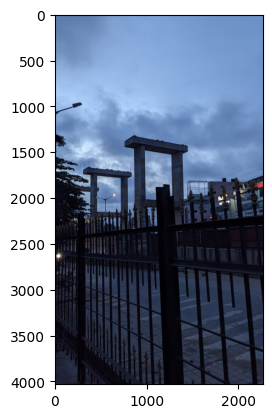

: 

In [ ]:
plt.imshow(image_cv_rgb)